# Regression with neural Network using TensorFlow


In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.12.0


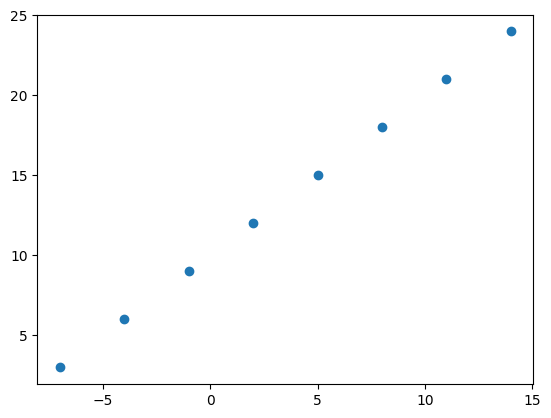

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7, -4, -1, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

# Input and Output Shapes

In [10]:
# Demo tensor for our housing price prediction problem

house_info = tf.constant(['bedroom', 'batheoom', 'garage'])
house_price = tf.constant([12904])

house_info, house_price
# here there is a difference for input and output shape

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'batheoom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([12904])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [13]:
X[0].ndim
#it has 0 dim, so it has no shape

0

In [21]:
#turn out numpy to tensor
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

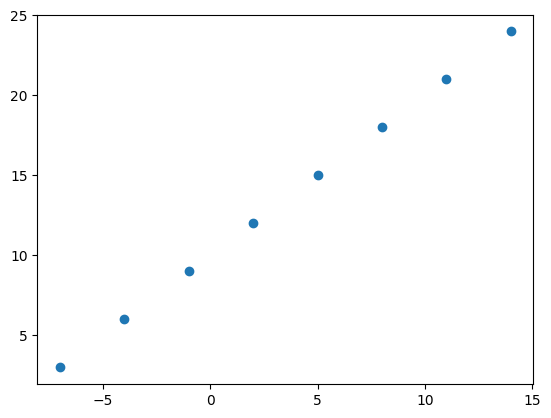

In [16]:
plt.scatter(X, y)

# Modelling

In [18]:
# set random seed
tf.random.set_seed(7)

In [53]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# we can use add method to add layers or put into the list as below
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
             metrics = ['mae'])

#fit the model

model.fit(
    tf.expand_dims(X, axis=-1), # for avoid shape error, Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    y,
    epochs = 100
)



Epoch 1/100
1/1 [==============================] - 0s 332ms/step - loss: 15.4386 - mae: 15.4386
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 15.1573 - mae: 15.1573
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 14.9099 - mae: 14.9099
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7774 - mae: 14.7774
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 14.6449 - mae: 14.6449
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 14.5124 - mae: 14.5124
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 14.3799 - mae: 14.3799
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 14.2474 - mae: 14.2474
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 14.1149 - mae: 14.1149
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 13.9824 - mae: 13.9824
Epoch 11/100
1/1 [==============================] -

1/1 [==============================] - 0s 7ms/step - loss: 6.9038 - mae: 6.9038
Epoch 88/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8981 - mae: 6.8981
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8925 - mae: 6.8925
Epoch 90/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8869 - mae: 6.8869
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8813 - mae: 6.8813
Epoch 92/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8756 - mae: 6.8756
Epoch 93/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8700 - mae: 6.8700
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 6.8644 - mae: 6.8644
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8588 - mae: 6.8588
Epoch 96/100
1/1 [==============================] - 0s 8ms/step - loss: 6.8531 - mae: 6.8531
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8475 -

In [54]:
model.predict([17])

1/1 [==============================] - 0s 70ms/step


array([[29.679066]], dtype=float32)

In [33]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [36]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# improving the Model

In [64]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# we can use add method to add layers or put into the list as below
modelA = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
modelA.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.Adam(lr = .0001), #stochastic gradient descent
             metrics = ['mae'])

#fit the model

modelA.fit(
    tf.expand_dims(X, axis=-1), # for avoid shape error, Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    y,
    epochs = 100
)



Epoch 1/100
1/1 [==============================] - 1s 518ms/step - loss: 13.1884 - mae: 13.1884
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 13.1020 - mae: 13.1020
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0155 - mae: 13.0155
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.9291 - mae: 12.9291
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 12.8426 - mae: 12.8426
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 12.7560 - mae: 12.7560
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 12.6694 - mae: 12.6694
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 12.5828 - mae: 12.5828
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4961 - mae: 12.4961
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4096 - mae: 12.4096
Epoch 11/100
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 5.9927 - mae: 5.9927
Epoch 88/100
1/1 [==============================] - 0s 7ms/step - loss: 5.8956 - mae: 5.8956
Epoch 89/100
1/1 [==============================] - 0s 6ms/step - loss: 5.7950 - mae: 5.7950
Epoch 90/100
1/1 [==============================] - 0s 8ms/step - loss: 5.6964 - mae: 5.6964
Epoch 91/100
1/1 [==============================] - 0s 9ms/step - loss: 5.5970 - mae: 5.5970
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 5.4969 - mae: 5.4969
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 5.3959 - mae: 5.3959
Epoch 94/100
1/1 [==============================] - 0s 8ms/step - loss: 5.2942 - mae: 5.2942
Epoch 95/100
1/1 [==============================] - 0s 12ms/step - loss: 5.1917 - mae: 5.1917
Epoch 96/100
1/1 [==============================] - 0s 13ms/step - loss: 5.0884 - mae: 5.0884
Epoch 97/100
1/1 [==============================] - 0s 12ms/step - loss: 4.9843 -

In [65]:
modelA.predict([17])

1/1 [==============================] - 0s 82ms/step


array([[26.920977]], dtype=float32)

In [66]:
modelA.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               200       
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [110]:
# set random seed
tf.random.set_seed(42)
# 1. Create a model using the Sequential API
# we can use add method to add layers or put into the list as below
modelB = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = None),
    #tf.keras.layers.Dense(3, activation = 'relu'),


    tf.keras.layers.Dense(1)
])

# 2. Compile the model
modelB.compile(loss=tf.keras.losses.mae, # mean absolute error
             optimizer=tf.keras.optimizers.Adam(0.01), #stochastic gradient descent
             metrics = ['mae'])

#fit the model

modelB.fit(
    tf.expand_dims(X, axis=-1), # for avoid shape error, Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    y,
    epochs = 100
)



Epoch 1/100
1/1 [==============================] - 0s 481ms/step - loss: 11.9652 - mae: 11.9652
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2458 - mae: 11.2458
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5183 - mae: 10.5183
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 9.7806 - mae: 9.7806
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 9.0304 - mae: 9.0304
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2652 - mae: 8.2652
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.4827 - mae: 7.4827
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 6.8918 - mae: 6.8918
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 6.9803 - mae: 6.9803
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 7.2436 - mae: 7.2436
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - 

1/1 [==============================] - 0s 6ms/step - loss: 0.1964 - mae: 0.1964
Epoch 89/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2471 - mae: 0.2471
Epoch 90/100
1/1 [==============================] - 0s 10ms/step - loss: 0.1349 - mae: 0.1349
Epoch 91/100
1/1 [==============================] - 0s 8ms/step - loss: 0.2485 - mae: 0.2485
Epoch 92/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1708 - mae: 0.1708
Epoch 93/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2581 - mae: 0.2581
Epoch 94/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3015 - mae: 0.3015
Epoch 95/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2049 - mae: 0.2049
Epoch 96/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2110 - mae: 0.2110
Epoch 97/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1478 - mae: 0.1478
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0474 - 

In [112]:
modelB.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 50)                100       
                                                                 
 dense_84 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [111]:
modelB.predict([17.0])

1/1 [==============================] - 0s 99ms/step


array([[27.179876]], dtype=float32)

# Working with a bit bigger dataset


In [149]:
X = tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [150]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

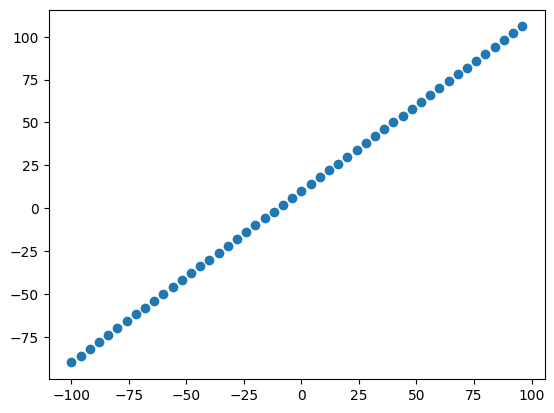

In [151]:
plt.scatter(X, y)

In [152]:
len(y)

50

In [153]:
X_train = X[:40] #1st 40 data
y_train = y[:40] 

X_test = X[40:] #rest of data
y_test = y[40:]
len(X_train), len(y_test)

(40, 10)

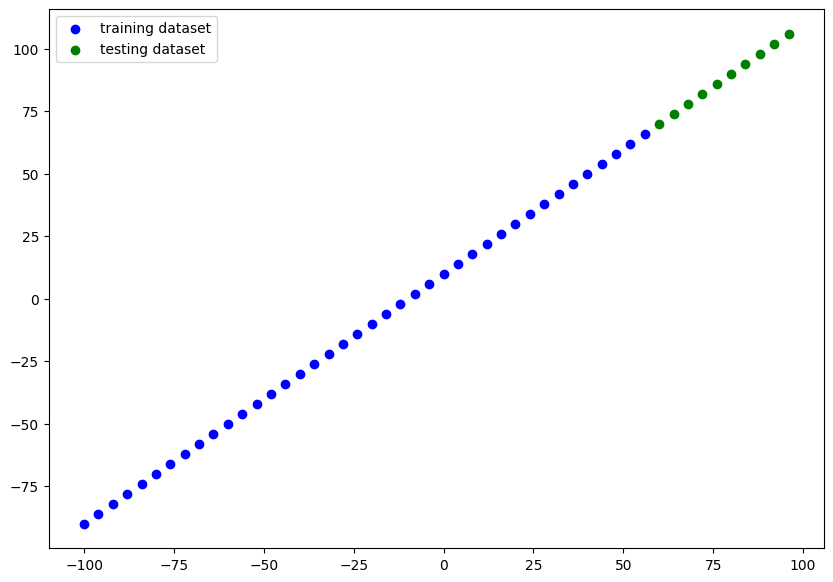

In [154]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.legend()

In [165]:
# let's bouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(10,input_shape=[1], activation = 'relu'),

    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 29.7475 - mae: 29.7475
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 27.7362 - mae: 27.7362
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 33.4874 - mae: 33.4874
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 19.3813 - mae: 19.3813
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 20.2737 - mae: 20.2737
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4838 - mae: 13.4838
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 13.0660 - mae: 13.0660
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.4410 - mae: 10.4410
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 29.6306 - mae: 29.6306
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 15.6897 - mae: 15.6897
Epoch 11/100
2/2 [==============================] - 0s

2/2 [==============================] - 0s 5ms/step - loss: 12.0431 - mae: 12.0431
Epoch 88/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2872 - mae: 10.2872
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 6.8120 - mae: 6.8120
Epoch 90/100
2/2 [==============================] - 0s 8ms/step - loss: 15.6331 - mae: 15.6331
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6132 - mae: 11.6132
Epoch 92/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1521 - mae: 9.1521
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0954 - mae: 9.0954
Epoch 94/100
2/2 [==============================] - 0s 15ms/step - loss: 12.3980 - mae: 12.3980
Epoch 95/100
2/2 [==============================] - 0s 10ms/step - loss: 15.6152 - mae: 15.6152
Epoch 96/100
2/2 [==============================] - 0s 11ms/step - loss: 7.9869 - mae: 7.9869
Epoch 97/100
2/2 [==============================] - 0s 12ms/step - l

In [166]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_115 (Dense)           (None, 10)                20        
                                                                 
 dense_116 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [158]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [159]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [167]:
prediction = model.predict(X_test)

1/1 [==============================] - 0s 120ms/step


In [168]:
prediction

array([[58.32114 ],
       [62.164997],
       [66.00885 ],
       [69.8527  ],
       [73.696556],
       [77.540405],
       [81.384254],
       [85.2281  ],
       [89.07196 ],
       [92.91581 ]], dtype=float32)

In [169]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

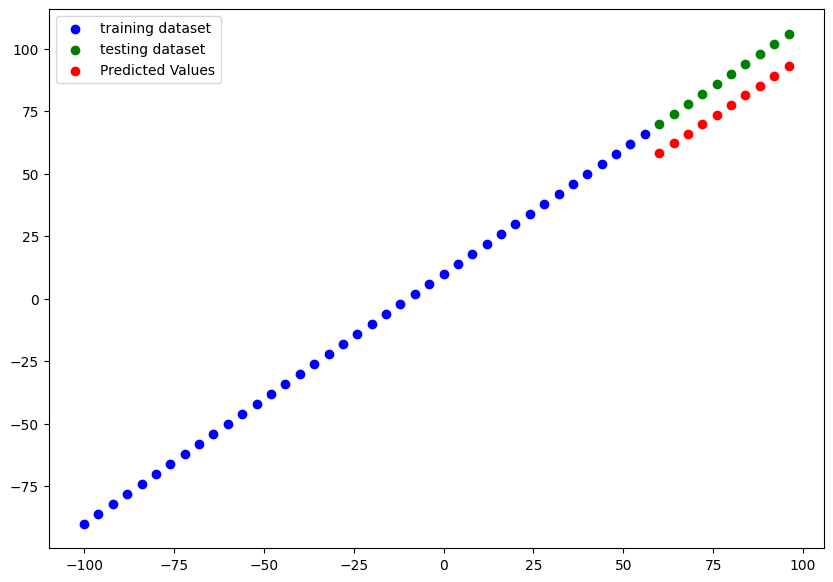

In [170]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [171]:
# let's Rebouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(100,input_shape=[1], activation = 'relu'),

    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 37.4020 - mae: 37.4020
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 19.8935 - mae: 19.8935
Epoch 3/100
2/2 [==============================] - 0s 15ms/step - loss: 14.8714 - mae: 14.8714
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 7.2818 - mae: 7.2818
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5857 - mae: 11.5857
Epoch 6/100
2/2 [==============================] - 0s 14ms/step - loss: 8.9356 - mae: 8.9356
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 12.9681 - mae: 12.9681
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 14.4137 - mae: 14.4137
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 21.9382 - mae: 21.9382
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 9.7116 - mae: 9.7116
Epoch 11/100
2/2 [==============================] - 0s 8m

2/2 [==============================] - 0s 8ms/step - loss: 12.2362 - mae: 12.2362
Epoch 88/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5006 - mae: 10.5006
Epoch 89/100
2/2 [==============================] - 0s 6ms/step - loss: 6.8244 - mae: 6.8244
Epoch 90/100
2/2 [==============================] - 0s 9ms/step - loss: 15.5433 - mae: 15.5433
Epoch 91/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8298 - mae: 11.8298
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4203 - mae: 9.4203
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0590 - mae: 9.0590
Epoch 94/100
2/2 [==============================] - 0s 6ms/step - loss: 12.2748 - mae: 12.2748
Epoch 95/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9483 - mae: 15.9483
Epoch 96/100
2/2 [==============================] - 0s 17ms/step - loss: 8.1812 - mae: 8.1812
Epoch 97/100
2/2 [==============================] - 0s 16ms/step - lo

In [176]:
prediction = model.predict(X_test)
prediction

1/1 [==============================] - 0s 46ms/step


array([[58.20425 ],
       [62.038616],
       [65.872986],
       [69.70735 ],
       [73.54171 ],
       [77.376076],
       [81.210434],
       [85.04471 ],
       [88.87901 ],
       [92.7133  ]], dtype=float32)

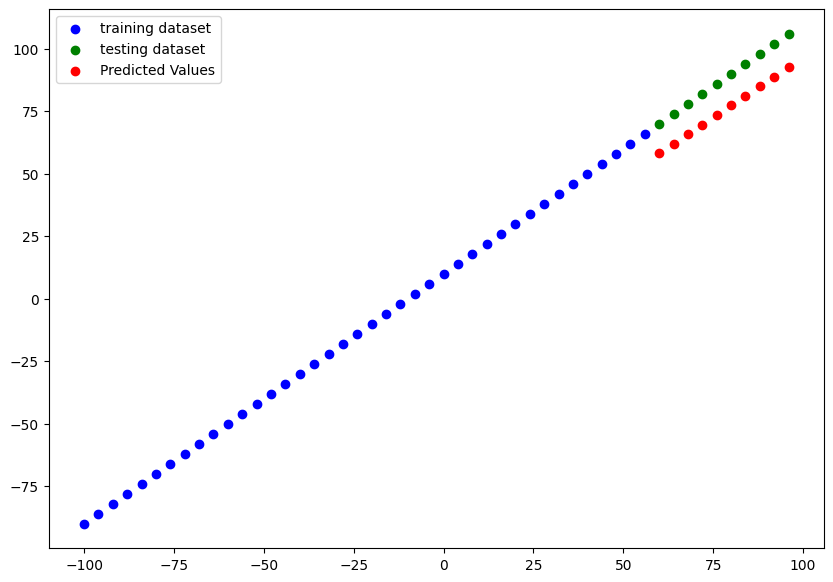

In [174]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [185]:
# let's Rebouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(50,input_shape=[1], activation = None),

    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 50.4641 - mae: 50.4641
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 27.6610 - mae: 27.6610
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 31.7450 - mae: 31.7450
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 13.5772 - mae: 13.5772
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 18.4323 - mae: 18.4323
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 9.2984 - mae: 9.2984
Epoch 7/100
2/2 [==============================] - 0s 16ms/step - loss: 10.3082 - mae: 10.3082
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2459 - mae: 11.2459
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 42.2788 - mae: 42.2788
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 29.4415 - mae: 29.4415
Epoch 11/100
2/2 [==============================] - 

2/2 [==============================] - 0s 5ms/step - loss: 19.2000 - mae: 19.2000
Epoch 88/100
2/2 [==============================] - 0s 6ms/step - loss: 29.5827 - mae: 29.5827
Epoch 89/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1404 - mae: 10.1404
Epoch 90/100
2/2 [==============================] - 0s 2ms/step - loss: 21.3266 - mae: 21.3266
Epoch 91/100
2/2 [==============================] - 0s 10ms/step - loss: 10.5253 - mae: 10.5253
Epoch 92/100
2/2 [==============================] - 0s 8ms/step - loss: 18.2202 - mae: 18.2202
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 6.8094 - mae: 6.8094
Epoch 94/100
2/2 [==============================] - 0s 7ms/step - loss: 13.0145 - mae: 13.0145
Epoch 95/100
2/2 [==============================] - 0s 8ms/step - loss: 18.4115 - mae: 18.4115
Epoch 96/100
2/2 [==============================] - 0s 14ms/step - loss: 10.3504 - mae: 10.3504
Epoch 97/100
2/2 [==============================] - 0s 10ms/ste

In [187]:
prediction=model.predict(X_test)
prediction, y_test

1/1 [==============================] - 0s 49ms/step


(array([[ 78.33572 ],
        [ 83.43885 ],
        [ 88.54198 ],
        [ 93.64512 ],
        [ 98.74825 ],
        [103.85139 ],
        [108.95451 ],
        [114.05765 ],
        [119.160774],
        [124.2639  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

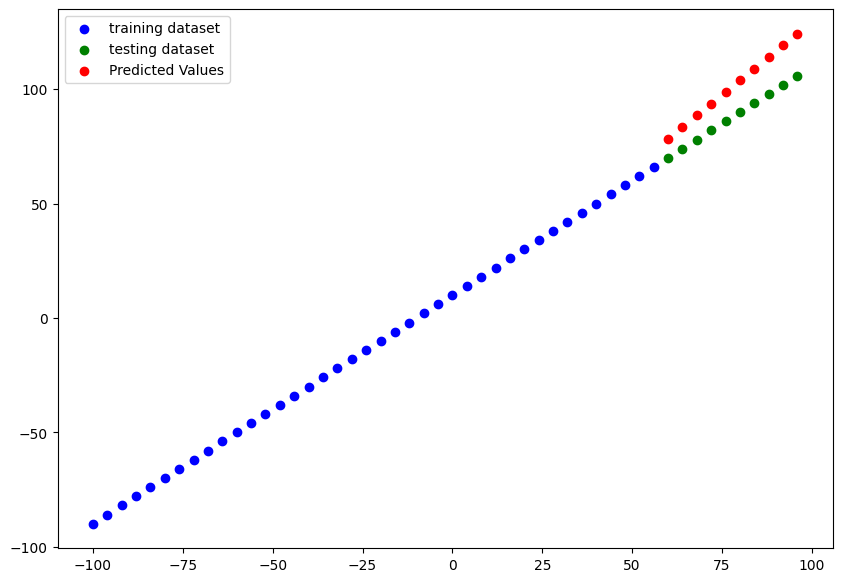

In [188]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [226]:
# let's Rebouild a model for this data
# create the model by defining the input shape arg in the first layer

model = tf.keras.Sequential([
    #tf.keras.layers.Dense(1,input_shape=[1]),

    tf.keras.layers.Dense(100,input_shape=[1], activation =None),
    tf.keras.layers.Dense(100,input_shape=[1], activation =None),


    tf.keras.layers.Dense(1, input_shape=[1])
], name = 'model_1')

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.001),
             metrics=['mae'])

# fit the model
model.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 31.4086 - mae: 31.4086
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 18.0916 - mae: 18.0916
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 8.3502 - mae: 8.3502
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.4959 - mae: 12.4959
Epoch 5/100
2/2 [==============================] - 0s 15ms/step - loss: 15.4686 - mae: 15.4686
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 15.5937 - mae: 15.5937
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 13.4340 - mae: 13.4340
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 10.4054 - mae: 10.4054
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 8.1348 - mae: 8.1348
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4249 - mae: 10.4249
Epoch 11/100
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 8ms/step - loss: 4.5520 - mae: 4.5520
Epoch 89/100
2/2 [==============================] - 0s 0s/step - loss: 2.8915 - mae: 2.8915
Epoch 90/100
2/2 [==============================] - 0s 9ms/step - loss: 3.3033 - mae: 3.3033
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 2.6274 - mae: 2.6274
Epoch 92/100
2/2 [==============================] - 0s 11ms/step - loss: 2.7062 - mae: 2.7062
Epoch 93/100
2/2 [==============================] - 0s 8ms/step - loss: 3.0251 - mae: 3.0251
Epoch 94/100
2/2 [==============================] - 0s 11ms/step - loss: 1.8431 - mae: 1.8431
Epoch 95/100
2/2 [==============================] - 0s 8ms/step - loss: 3.0341 - mae: 3.0341
Epoch 96/100
2/2 [==============================] - 0s 8ms/step - loss: 1.3513 - mae: 1.3513
Epoch 97/100
2/2 [==============================] - 0s 13ms/step - loss: 1.8146 - mae: 1.8146
Epoch 98/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1053 - 

In [227]:
prediction = model.predict(X_test)
prediction, y_test

1/1 [==============================] - 0s 121ms/step


(array([[ 71.12523 ],
        [ 75.22849 ],
        [ 79.33176 ],
        [ 83.43501 ],
        [ 87.538284],
        [ 91.64153 ],
        [ 95.744804],
        [ 99.84804 ],
        [103.95131 ],
        [108.054565]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

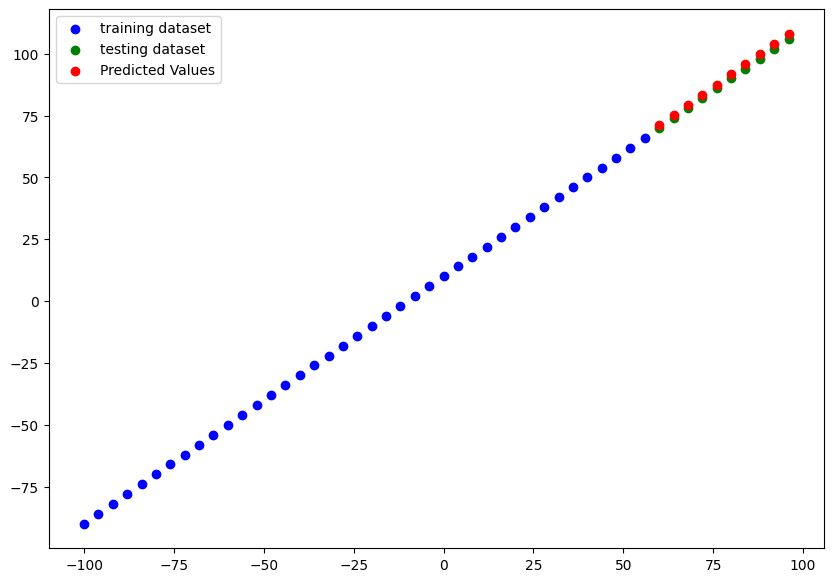

In [228]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X_test, prediction, c = 'r', label = 'Predicted Values')
plt.legend()

In [232]:
model.predict([5])

1/1 [==============================] - 0s 75ms/step


array([[14.705443]], dtype=float32)

In [233]:
lol = model.predict(X)
lol, X

2/2 [==============================] - 0s 6ms/step


(array([[-93.00511  ],
        [-88.90184  ],
        [-84.798584 ],
        [-80.69533  ],
        [-76.59207  ],
        [-72.48881  ],
        [-68.38555  ],
        [-64.28229  ],
        [-60.17903  ],
        [-56.07577  ],
        [-51.972515 ],
        [-47.86926  ],
        [-43.765995 ],
        [-39.66274  ],
        [-35.559483 ],
        [-31.456224 ],
        [-27.352964 ],
        [-23.249702 ],
        [-19.146446 ],
        [-15.043186 ],
        [-10.939926 ],
        [ -6.836669 ],
        [ -2.7334108],
        [  1.3698481],
        [  5.473107 ],
        [  9.5763645],
        [ 13.679625 ],
        [ 17.782883 ],
        [ 21.88614  ],
        [ 25.989399 ],
        [ 30.092657 ],
        [ 34.19592  ],
        [ 38.29917  ],
        [ 42.402435 ],
        [ 46.50569  ],
        [ 50.60895  ],
        [ 54.712208 ],
        [ 58.81547  ],
        [ 62.91872  ],
        [ 67.02198  ],
        [ 71.12523  ],
        [ 75.22849  ],
        [ 79.33176  ],
        [ 8

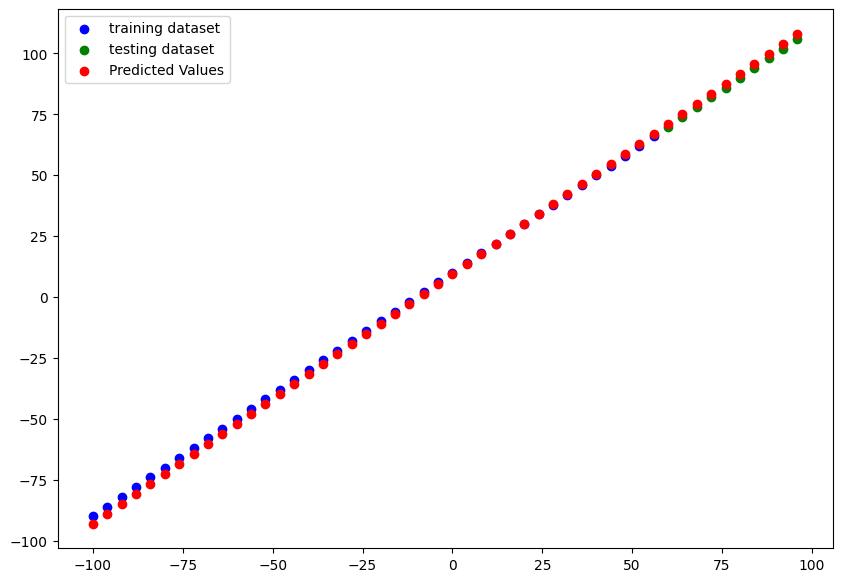

In [235]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c = 'b', label = 'training dataset')
plt.scatter(X_test, y_test, c='g', label = 'testing dataset')
plt.scatter(X, lol, c = 'r', label = 'Predicted Values')
plt.legend()

In [237]:
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 49ms/step


(array([[ 71.12523 ],
        [ 75.22849 ],
        [ 79.33176 ],
        [ 83.43501 ],
        [ 87.538284],
        [ 91.64153 ],
        [ 95.744804],
        [ 99.84804 ],
        [103.95131 ],
        [108.054565]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [240]:
# Calculate mean Square Errors
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([416.75787, 295.11142, 207.13843, 152.83911, 132.21318, 145.26077,
       191.98201, 272.37598, 386.44427, 534.18555], dtype=float32)>

In [246]:
# We shoul do squeeze here, bcz of different shape
y_pred = tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 71.12523 ,  75.22849 ,  79.33176 ,  83.43501 ,  87.538284,
        91.64153 ,  95.744804,  99.84804 , 103.95131 , 108.054565],
      dtype=float32)>

In [247]:
# Calculate mean Square Errors
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.6157553>

In [250]:
# Calculation of mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.5899025>

In [255]:
# Calcualte huber
huber = tf.metrics.Huber(y_test, y_pred)
huber

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'Huber'

In [257]:
# Calcualte huber
huber = tf.keras.losses.Huber()
huber = huber(y_test, y_pred).numpy()
huber

1.0899025

# The machine learning practitioner's motto is Experiment, Experiment and Experiment

In [258]:
# let's create 3 experimental model for this dataset

In [259]:
# dataset
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

In [261]:
# create first some useful methods
def predicted_plot(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions = y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c = 'b', label = 'Training dataset')
    plt.scatter(test_data, test_labels, c='g', label = 'Testing dataset')
    plt.scatter(test_data, predictions, c = 'r', label = 'Predicted Values')
    plt.legend()

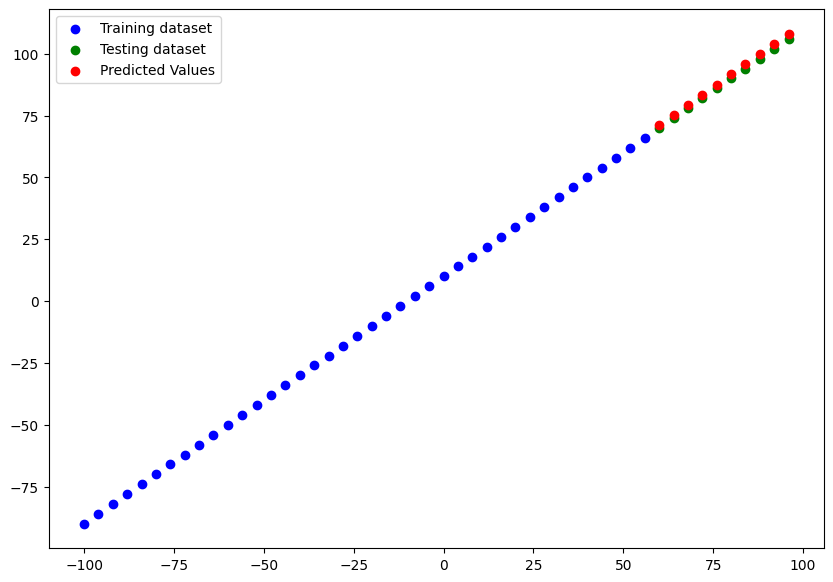

In [262]:
predicted_plot()

In [273]:
def mae(label_truth = y_test, label_predicted = y_pred):
    return tf.metrics.mean_absolute_error(label_truth, tf.squeeze(label_predicted))
    

In [274]:
lol=mae(y_test, y_pred)
lol

<tf.Tensor: shape=(), dtype=float32, numpy=1.5899025>

In [275]:
mae()

<tf.Tensor: shape=(), dtype=float32, numpy=1.5899025>

In [280]:
def mse(label_truth=y_test, label_predicted = y_pred):
    return tf.metrics.mean_squared_error(label_truth, tf.squeeze(label_predicted))

In [281]:
mse()

<tf.Tensor: shape=(), dtype=float32, numpy=2.6157553>

In [287]:
#create model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])
# fit
model_1.fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs = 100
)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 25.1711 - mae: 25.1711
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 8.2569 - mae: 8.2569
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3552 - mae: 10.3552
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 12.7880 - mae: 12.7880
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8326 - mae: 11.8326
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 10.9545 - mae: 10.9545
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 8.4605 - mae: 8.4605
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8672 - mae: 8.8672
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 17.1224 - mae: 17.1224
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 12.4548 - mae: 12.4548
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

2/2 [==============================] - 0s 7ms/step - loss: 11.4333 - mae: 11.4333
Epoch 88/100
2/2 [==============================] - 0s 9ms/step - loss: 9.9311 - mae: 9.9311
Epoch 89/100
2/2 [==============================] - 0s 14ms/step - loss: 7.2472 - mae: 7.2472
Epoch 90/100
2/2 [==============================] - 0s 8ms/step - loss: 12.6914 - mae: 12.6914
Epoch 91/100
2/2 [==============================] - 0s 9ms/step - loss: 7.3067 - mae: 7.3067
Epoch 92/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6699 - mae: 7.6699
Epoch 93/100
2/2 [==============================] - 0s 6ms/step - loss: 7.1129 - mae: 7.1129
Epoch 94/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5390 - mae: 12.5390
Epoch 95/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9141 - mae: 9.9141
Epoch 96/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1356 - mae: 9.1356
Epoch 97/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0

In [290]:
mae_1 = mae(y_test, model_1.predict(X_test))
mae_1

1/1 [==============================] - 0s 31ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=30.579632>

In [292]:
mse_1 = mse(y_test, model_1.predict(X_test))
mse_1

1/1 [==============================] - 0s 27ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=945.50635>

1/1 [==============================] - 0s 30ms/step


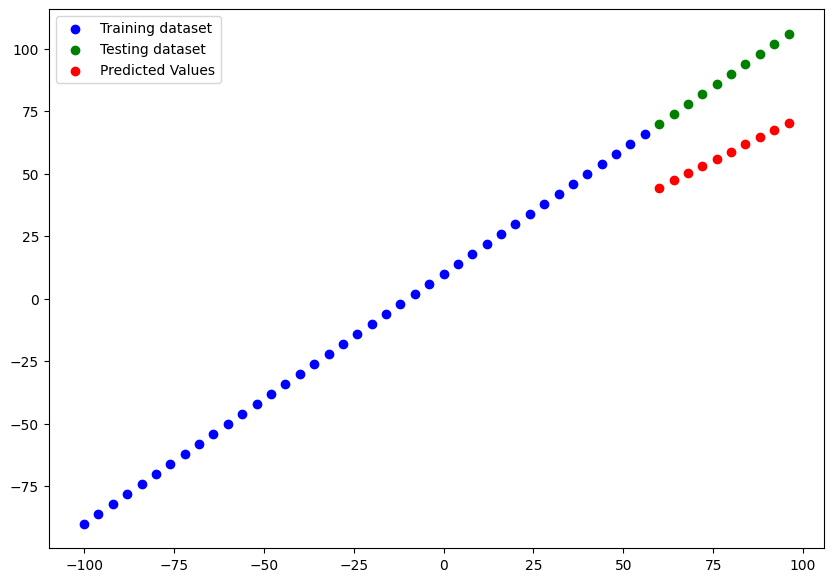

In [294]:
predicted_plot(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions = model_1.predict(X_test))

In [296]:
# model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Compile
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit
model_2.fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=100
)

Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 12.5489 - mae: 12.5489
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 18.1423 - mae: 18.1423
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 21.7559 - mae: 21.7559
Epoch 4/100
2/2 [==============================] - 0s 13ms/step - loss: 12.6390 - mae: 12.6390
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.5913 - mae: 15.5913
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 12.3652 - mae: 12.3652
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.6447 - mae: 11.6447
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0469 - mae: 12.0469
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 37.7040 - mae: 37.7040
Epoch 10/100
2/2 [==============================] - 0s 15ms/step - loss: 25.3405 - mae: 25.3405
Epoch 11/100
2/2 [==============================] - 0

2/2 [==============================] - 0s 10ms/step - loss: 19.3179 - mae: 19.3179
Epoch 88/100
2/2 [==============================] - 0s 10ms/step - loss: 29.2726 - mae: 29.2726
Epoch 89/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0892 - mae: 10.0892
Epoch 90/100
2/2 [==============================] - 0s 15ms/step - loss: 21.0797 - mae: 21.0797
Epoch 91/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4610 - mae: 10.4610
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 18.0043 - mae: 18.0043
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 6.5438 - mae: 6.5438
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1221 - mae: 11.1221
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 24.4208 - mae: 24.4208
Epoch 96/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7302 - mae: 10.7302
Epoch 97/100
2/2 [==============================] - 0s 7ms/ste

In [298]:
mae_2 = mae(y_test, model_2.predict(X_test))
mae_2

1/1 [==============================] - 0s 67ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=11.028481>

In [299]:
mse_2 = mse(y_test, model_2.predict(X_test))
mse_2

1/1 [==============================] - 0s 32ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=129.6862>

1/1 [==============================] - 0s 35ms/step


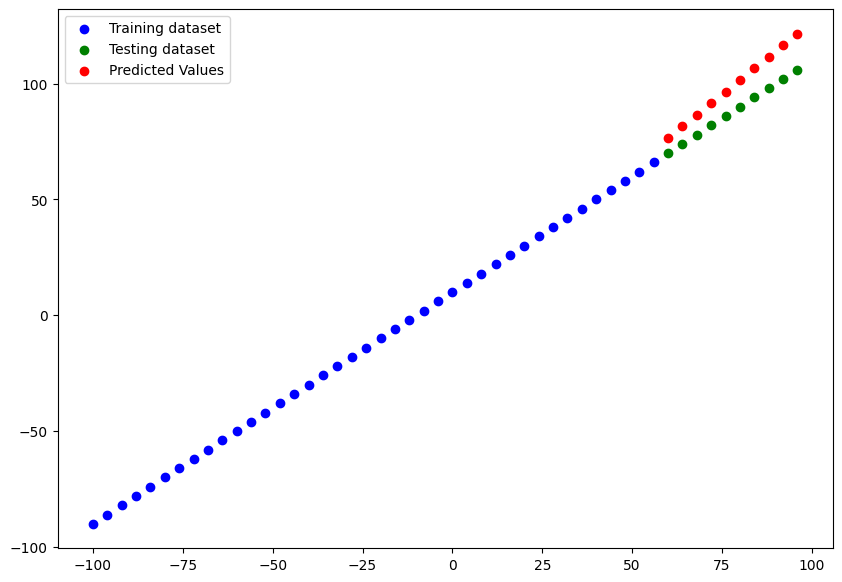

In [300]:
predicted_plot(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions = model_2.predict(X_test))

In [301]:
# model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Compile
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit
model_3.fit(
    tf.expand_dims(X_train, axis=-1),
    y_train,
    epochs=500
)

Epoch 1/500
2/2 [==============================] - 1s 5ms/step - loss: 46.2018 - mae: 46.2018
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 30.4382 - mae: 30.4382
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 35.6511 - mae: 35.6511
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 26.7650 - mae: 26.7650
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.6481 - mae: 14.6481
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.6825 - mae: 11.6825
Epoch 7/500
2/2 [==============================] - 0s 14ms/step - loss: 12.7561 - mae: 12.7561
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 11.0719 - mae: 11.0719
Epoch 9/500
2/2 [==============================] - 0s 9ms/step - loss: 40.1603 - mae: 40.1603
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.5961 - mae: 27.5961
Epoch 11/500
2/2 [==============================] - 0s 6m

2/2 [==============================] - 0s 5ms/step - loss: 24.4794 - mae: 24.4794
Epoch 88/500
2/2 [==============================] - 0s 6ms/step - loss: 19.1415 - mae: 19.1415
Epoch 89/500
2/2 [==============================] - 0s 6ms/step - loss: 7.1430 - mae: 7.1430
Epoch 90/500
2/2 [==============================] - 0s 5ms/step - loss: 18.1974 - mae: 18.1974
Epoch 91/500
2/2 [==============================] - 0s 6ms/step - loss: 13.2443 - mae: 13.2443
Epoch 92/500
2/2 [==============================] - 0s 8ms/step - loss: 14.7729 - mae: 14.7729
Epoch 93/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0731 - mae: 11.0731
Epoch 94/500
2/2 [==============================] - 0s 5ms/step - loss: 16.6606 - mae: 16.6606
Epoch 95/500
2/2 [==============================] - 0s 6ms/step - loss: 16.0239 - mae: 16.0239
Epoch 96/500
2/2 [==============================] - 0s 7ms/step - loss: 10.5522 - mae: 10.5522
Epoch 97/500
2/2 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 10ms/step - loss: 28.8356 - mae: 28.8356
Epoch 173/500
2/2 [==============================] - 0s 11ms/step - loss: 16.5276 - mae: 16.5276
Epoch 174/500
2/2 [==============================] - 0s 10ms/step - loss: 11.2138 - mae: 11.2138
Epoch 175/500
2/2 [==============================] - 0s 9ms/step - loss: 27.5838 - mae: 27.5838
Epoch 176/500
2/2 [==============================] - 0s 8ms/step - loss: 8.2717 - mae: 8.2717
Epoch 177/500
2/2 [==============================] - 0s 13ms/step - loss: 9.2622 - mae: 9.2622
Epoch 178/500
2/2 [==============================] - 0s 10ms/step - loss: 18.1456 - mae: 18.1456
Epoch 179/500
2/2 [==============================] - 0s 14ms/step - loss: 10.5991 - mae: 10.5991
Epoch 180/500
2/2 [==============================] - 0s 10ms/step - loss: 7.9035 - mae: 7.9035
Epoch 181/500
2/2 [==============================] - 0s 9ms/step - loss: 17.4034 - mae: 17.4034
Epoch 182/500
2/2 [==============================] - 

2/2 [==============================] - 0s 7ms/step - loss: 10.5963 - mae: 10.5963
Epoch 258/500
2/2 [==============================] - 0s 5ms/step - loss: 14.5073 - mae: 14.5073
Epoch 259/500
2/2 [==============================] - 0s 6ms/step - loss: 8.6193 - mae: 8.6193
Epoch 260/500
2/2 [==============================] - 0s 5ms/step - loss: 43.0961 - mae: 43.0961
Epoch 261/500
2/2 [==============================] - 0s 8ms/step - loss: 18.4862 - mae: 18.4862
Epoch 262/500
2/2 [==============================] - 0s 8ms/step - loss: 6.8787 - mae: 6.8787
Epoch 263/500
2/2 [==============================] - 0s 10ms/step - loss: 13.7160 - mae: 13.7160
Epoch 264/500
2/2 [==============================] - 0s 9ms/step - loss: 21.0044 - mae: 21.0044
Epoch 265/500
2/2 [==============================] - 0s 8ms/step - loss: 19.4006 - mae: 19.4006
Epoch 266/500
2/2 [==============================] - 0s 8ms/step - loss: 11.4631 - mae: 11.4631
Epoch 267/500
2/2 [==============================] - 0s 1

2/2 [==============================] - 0s 10ms/step - loss: 13.9764 - mae: 13.9764
Epoch 343/500
2/2 [==============================] - 0s 9ms/step - loss: 11.4990 - mae: 11.4990
Epoch 344/500
2/2 [==============================] - 0s 10ms/step - loss: 9.9295 - mae: 9.9295
Epoch 345/500
2/2 [==============================] - 0s 11ms/step - loss: 31.2307 - mae: 31.2307
Epoch 346/500
2/2 [==============================] - 0s 10ms/step - loss: 10.8238 - mae: 10.8238
Epoch 347/500
2/2 [==============================] - 0s 11ms/step - loss: 26.0371 - mae: 26.0371
Epoch 348/500
2/2 [==============================] - 0s 11ms/step - loss: 12.0104 - mae: 12.0104
Epoch 349/500
2/2 [==============================] - 0s 7ms/step - loss: 12.7372 - mae: 12.7372
Epoch 350/500
2/2 [==============================] - 0s 8ms/step - loss: 15.2929 - mae: 15.2929
Epoch 351/500
2/2 [==============================] - 0s 12ms/step - loss: 32.6887 - mae: 32.6887
Epoch 352/500
2/2 [==============================

2/2 [==============================] - 0s 9ms/step - loss: 6.2839 - mae: 6.2839
Epoch 428/500
2/2 [==============================] - 0s 9ms/step - loss: 13.0607 - mae: 13.0607
Epoch 429/500
2/2 [==============================] - 0s 9ms/step - loss: 10.8408 - mae: 10.8408
Epoch 430/500
2/2 [==============================] - 0s 5ms/step - loss: 11.7068 - mae: 11.7068
Epoch 431/500
2/2 [==============================] - 0s 7ms/step - loss: 7.8665 - mae: 7.8665
Epoch 432/500
2/2 [==============================] - 0s 8ms/step - loss: 22.1363 - mae: 22.1363
Epoch 433/500
2/2 [==============================] - 0s 6ms/step - loss: 5.8688 - mae: 5.8688
Epoch 434/500
2/2 [==============================] - 0s 9ms/step - loss: 32.6588 - mae: 32.6588
Epoch 435/500
2/2 [==============================] - 0s 10ms/step - loss: 13.6591 - mae: 13.6591
Epoch 436/500
2/2 [==============================] - 0s 10ms/step - loss: 28.9014 - mae: 28.9014
Epoch 437/500
2/2 [==============================] - 0s 9m

In [303]:
mae_3 = mae(y_test, model_3.predict(X_test))
mae_3

1/1 [==============================] - 0s 68ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=68.017685>

In [304]:
mse_3 = mse(y_test, model_3.predict(X_test))
mse_3

1/1 [==============================] - 0s 38ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=4711.3022>

1/1 [==============================] - 0s 35ms/step


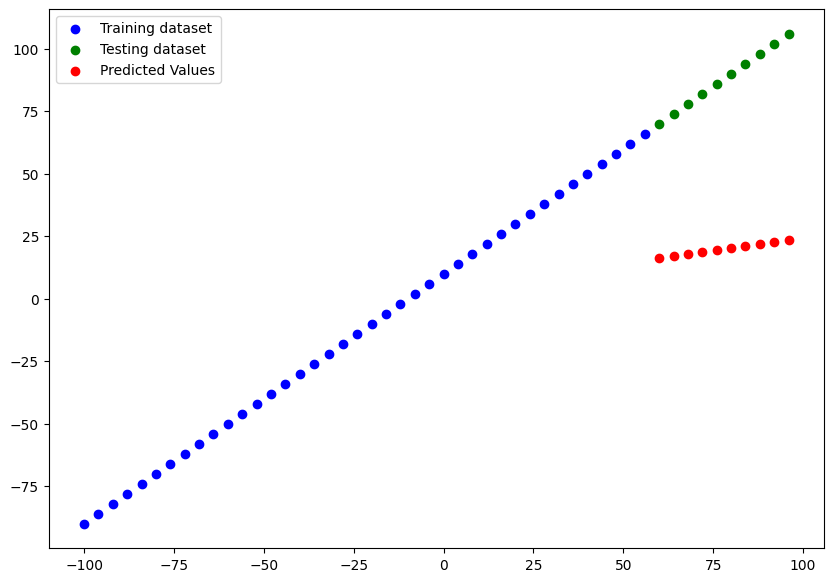

In [305]:
predicted_plot(train_data = X_train, train_labels=y_train, test_data=X_test, test_labels = y_test, predictions = model_3.predict(X_test))

In [311]:
#Compare

import pandas as pd
model_result = [['model_1', mae_1.numpy(), mse_1.numpy()],
               ['model_2', mae_2.numpy(), mse_2.numpy()],
               ['model_3', mae_3.numpy(), mse_3.numpy()]]
table = pd.DataFrame(model_result, columns=['model', 'mea', 'mse'])
table

,model,mea,mse
0,model_1,30.579632,945.506348
1,model_2,11.028481,129.686203
2,model_3,68.017685,4711.302246


# Working with a large Dataset

In [312]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [318]:
# read in the dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [322]:
insurance.sex.unique(), insurance.describe()

(array(['female', 'male'], dtype=object),
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

In [327]:
# in get_dummies() method we pass a specific column then it will do on hot encode only this column. 
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [328]:
insurance.shape, insurance_one_hot.shape

((1338, 7), (1338, 12))

In [329]:
insurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [331]:
# create X and y values ()
X = insurance_one_hot.drop('charges', axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [334]:
y = insurance_one_hot['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [335]:
#create train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1070, 11), (268, 11))

In [342]:
# create random seed
tf.random.set_seed(42)

# Create model_1
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit the model
model_1.fit(
    X_train,
    y_train,
    epochs=100
)


Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8648.8359 - mae: 8648.8359
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7766.5488 - mae: 7766.5488
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7617.1846 - mae: 7617.1846
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7676.8496 - mae: 7676.8496
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7687.9937 - mae: 7687.9937
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7612.5601 - mae: 7612.5601
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7615.9492 - mae: 7615.9492
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7695.4072 - mae: 7695.4072
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7530.0103 - mae: 7530.0103
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7684.1416 - mae: 7684.1416

34/34 [==============================] - 0s 2ms/step - loss: 7300.7583 - mae: 7300.7583
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 7511.2437 - mae: 7511.2437
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 7198.0229 - mae: 7198.0229
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 7454.5391 - mae: 7454.5391
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 7427.1602 - mae: 7427.1602
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 7295.7681 - mae: 7295.7681
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 7303.9448 - mae: 7303.9448
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 7517.7539 - mae: 7517.7539
Epoch 90/100
34/34 [==============================] - 0s 1ms/step - loss: 7004.7520 - mae: 7004.7520
Epoch 91/100
34/34 [==============================] - 0s 1ms/step - loss: 7179.3320 - mae: 7179.3320
Epo

In [348]:
# create random seed
tf.random.set_seed(42)

# Create model_1
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
#fit the model
model_2.fit(
    X_train,
    y_train,
    epochs=100
)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: nan - mae: nan           
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 

34/34 [==============================] - 0s 3ms/step - loss: nan - mae: nan
Epoch 94/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 95/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 96/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 97/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 98/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 99/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan
Epoch 100/100
34/34 [==============================] - 0s 2ms/step - loss: nan - mae: nan


In [356]:
# create random seed
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['mae'])
#fit the model
history=model_3.fit(
    X_train,
    y_train,
    epochs=500
)


Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13214.6328 - mae: 13214.6328
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 12533.9707 - mae: 12533.9707
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 10559.5801 - mae: 10559.5801
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 7945.8525 - mae: 7945.8525
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 7466.2300 - mae: 7466.2300
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 7419.1172 - mae: 7419.1172
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 7366.3921 - mae: 7366.3921
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 7326.0596 - mae: 7326.0596
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 7284.5054 - mae: 7284.5054
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 7244.1846 - mae: 724

34/34 [==============================] - 0s 2ms/step - loss: 3740.9937 - mae: 3740.9937
Epoch 83/500
34/34 [==============================] - 0s 2ms/step - loss: 3741.1343 - mae: 3741.1343
Epoch 84/500
34/34 [==============================] - 0s 3ms/step - loss: 3743.3152 - mae: 3743.3152
Epoch 85/500
34/34 [==============================] - 0s 3ms/step - loss: 3733.1055 - mae: 3733.1055
Epoch 86/500
34/34 [==============================] - 0s 3ms/step - loss: 3730.2239 - mae: 3730.2239
Epoch 87/500
34/34 [==============================] - 0s 3ms/step - loss: 3723.9739 - mae: 3723.9739
Epoch 88/500
34/34 [==============================] - 0s 3ms/step - loss: 3725.9824 - mae: 3725.9824
Epoch 89/500
34/34 [==============================] - 0s 4ms/step - loss: 3728.2783 - mae: 3728.2783
Epoch 90/500
34/34 [==============================] - 0s 3ms/step - loss: 3715.7280 - mae: 3715.7280
Epoch 91/500
34/34 [==============================] - 0s 2ms/step - loss: 3711.6138 - mae: 3711.6138
Epo

34/34 [==============================] - 0s 2ms/step - loss: 3504.6172 - mae: 3504.6172
Epoch 163/500
34/34 [==============================] - 0s 2ms/step - loss: 3503.2419 - mae: 3503.2419
Epoch 164/500
34/34 [==============================] - 0s 2ms/step - loss: 3524.7854 - mae: 3524.7854
Epoch 165/500
34/34 [==============================] - 0s 2ms/step - loss: 3514.2371 - mae: 3514.2371
Epoch 166/500
34/34 [==============================] - 0s 2ms/step - loss: 3495.8394 - mae: 3495.8394
Epoch 167/500
34/34 [==============================] - 0s 2ms/step - loss: 3501.7222 - mae: 3501.7222
Epoch 168/500
34/34 [==============================] - 0s 2ms/step - loss: 3497.7456 - mae: 3497.7456
Epoch 169/500
34/34 [==============================] - 0s 2ms/step - loss: 3491.7097 - mae: 3491.7097
Epoch 170/500
34/34 [==============================] - 0s 2ms/step - loss: 3487.0554 - mae: 3487.0554
Epoch 171/500
34/34 [==============================] - 0s 2ms/step - loss: 3489.0762 - mae: 3489

34/34 [==============================] - 0s 2ms/step - loss: 3492.6777 - mae: 3492.6777
Epoch 243/500
34/34 [==============================] - 0s 2ms/step - loss: 3481.4968 - mae: 3481.4968
Epoch 244/500
34/34 [==============================] - 0s 2ms/step - loss: 3498.4177 - mae: 3498.4177
Epoch 245/500
34/34 [==============================] - 0s 4ms/step - loss: 3500.3069 - mae: 3500.3069
Epoch 246/500
34/34 [==============================] - 0s 2ms/step - loss: 3485.4590 - mae: 3485.4590
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 3478.3635 - mae: 3478.3635
Epoch 248/500
34/34 [==============================] - 0s 2ms/step - loss: 3496.5708 - mae: 3496.5708
Epoch 249/500
34/34 [==============================] - 0s 3ms/step - loss: 3508.5627 - mae: 3508.5627
Epoch 250/500
34/34 [==============================] - 0s 3ms/step - loss: 3480.1646 - mae: 3480.1646
Epoch 251/500
34/34 [==============================] - 0s 2ms/step - loss: 3493.4360 - mae: 3493

34/34 [==============================] - 0s 2ms/step - loss: 3487.8113 - mae: 3487.8113
Epoch 323/500
34/34 [==============================] - 0s 2ms/step - loss: 3480.1306 - mae: 3480.1306
Epoch 324/500
34/34 [==============================] - 0s 2ms/step - loss: 3494.2744 - mae: 3494.2744
Epoch 325/500
34/34 [==============================] - 0s 2ms/step - loss: 3479.8394 - mae: 3479.8394
Epoch 326/500
34/34 [==============================] - 0s 2ms/step - loss: 3491.0032 - mae: 3491.0032
Epoch 327/500
34/34 [==============================] - 0s 2ms/step - loss: 3489.0254 - mae: 3489.0254
Epoch 328/500
34/34 [==============================] - 0s 2ms/step - loss: 3516.7737 - mae: 3516.7737
Epoch 329/500
34/34 [==============================] - 0s 2ms/step - loss: 3495.6743 - mae: 3495.6743
Epoch 330/500
34/34 [==============================] - 0s 2ms/step - loss: 3483.4539 - mae: 3483.4539
Epoch 331/500
34/34 [==============================] - 0s 2ms/step - loss: 3487.7961 - mae: 3487

34/34 [==============================] - 0s 2ms/step - loss: 3481.0818 - mae: 3481.0818
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 3492.5632 - mae: 3492.5632
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 3504.4380 - mae: 3504.4380
Epoch 405/500
34/34 [==============================] - 0s 2ms/step - loss: 3483.0349 - mae: 3483.0349
Epoch 406/500
34/34 [==============================] - 0s 3ms/step - loss: 3499.3940 - mae: 3499.3940
Epoch 407/500
34/34 [==============================] - 0s 2ms/step - loss: 3498.0073 - mae: 3498.0073
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 3489.9238 - mae: 3489.9238
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 3499.5735 - mae: 3499.5735
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 3492.6702 - mae: 3492.6702
Epoch 411/500
34/34 [==============================] - 0s 3ms/step - loss: 3490.7695 - mae: 3490

34/34 [==============================] - 0s 3ms/step - loss: 3492.5620 - mae: 3492.5620
Epoch 483/500
34/34 [==============================] - 0s 3ms/step - loss: 3484.9319 - mae: 3484.9319
Epoch 484/500
34/34 [==============================] - 0s 2ms/step - loss: 3479.9519 - mae: 3479.9519
Epoch 485/500
34/34 [==============================] - 0s 2ms/step - loss: 3506.5149 - mae: 3506.5149
Epoch 486/500
34/34 [==============================] - 0s 2ms/step - loss: 3488.7825 - mae: 3488.7825
Epoch 487/500
34/34 [==============================] - 0s 2ms/step - loss: 3498.5559 - mae: 3498.5559
Epoch 488/500
34/34 [==============================] - 0s 2ms/step - loss: 3483.5010 - mae: 3483.5010
Epoch 489/500
34/34 [==============================] - 0s 3ms/step - loss: 3477.1836 - mae: 3477.1836
Epoch 490/500
34/34 [==============================] - 0s 2ms/step - loss: 3480.4683 - mae: 3480.4683
Epoch 491/500
34/34 [==============================] - 0s 2ms/step - loss: 3502.6279 - mae: 3502

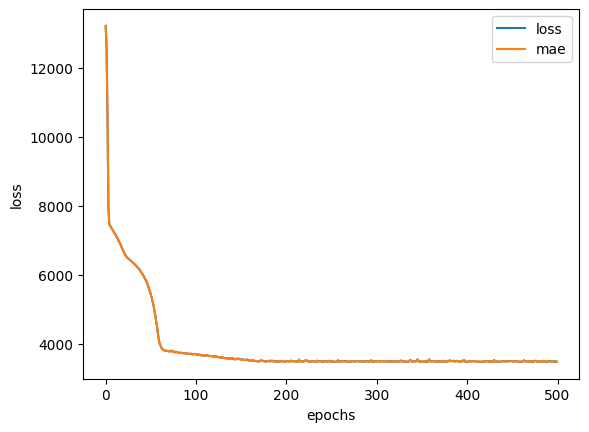

In [357]:

# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
     


In [368]:
# create random seed
tf.random.set_seed(42)

# Create model_3
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),

    tf.keras.layers.Dense(1)
])

# Compile
model_4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['mae'])
#fit the model
history_4=model_4.fit(
    X_train,
    y_train,
    epochs=500
)


Epoch 1/500
34/34 [==============================] - 2s 2ms/step - loss: 13111.7266 - mae: 13111.7266
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 8188.1646 - mae: 8188.1646
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 7208.1431 - mae: 7208.1431
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 6976.3042 - mae: 6976.3042
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 6822.3369 - mae: 6822.3369
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 6671.8174 - mae: 6671.8174
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 6622.0581 - mae: 6622.0581
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 6568.6011 - mae: 6568.6011
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 6504.9194 - mae: 6504.9194
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 6415.4326 - mae: 6415.43

34/34 [==============================] - 0s 5ms/step - loss: 2143.9790 - mae: 2143.9790
Epoch 83/500
34/34 [==============================] - 0s 3ms/step - loss: 2172.1973 - mae: 2172.1973
Epoch 84/500
34/34 [==============================] - 0s 3ms/step - loss: 2136.7842 - mae: 2136.7842
Epoch 85/500
34/34 [==============================] - 0s 2ms/step - loss: 2114.1235 - mae: 2114.1235
Epoch 86/500
34/34 [==============================] - 0s 3ms/step - loss: 2137.9634 - mae: 2137.9634
Epoch 87/500
34/34 [==============================] - 0s 2ms/step - loss: 2125.6736 - mae: 2125.6736
Epoch 88/500
34/34 [==============================] - 0s 3ms/step - loss: 2054.1465 - mae: 2054.1465
Epoch 89/500
34/34 [==============================] - 0s 3ms/step - loss: 2087.6301 - mae: 2087.6301
Epoch 90/500
34/34 [==============================] - 0s 3ms/step - loss: 2362.6597 - mae: 2362.6597
Epoch 91/500
34/34 [==============================] - 0s 5ms/step - loss: 2279.0574 - mae: 2279.0574
Epo

34/34 [==============================] - 0s 3ms/step - loss: 1995.5458 - mae: 1995.5458
Epoch 163/500
34/34 [==============================] - 0s 3ms/step - loss: 2007.4448 - mae: 2007.4448
Epoch 164/500
34/34 [==============================] - 0s 3ms/step - loss: 2003.9259 - mae: 2003.9259
Epoch 165/500
34/34 [==============================] - 0s 3ms/step - loss: 2006.3666 - mae: 2006.3666
Epoch 166/500
34/34 [==============================] - 0s 3ms/step - loss: 2005.5391 - mae: 2005.5391
Epoch 167/500
34/34 [==============================] - 0s 3ms/step - loss: 1926.7594 - mae: 1926.7594
Epoch 168/500
34/34 [==============================] - 0s 2ms/step - loss: 1983.4302 - mae: 1983.4302
Epoch 169/500
34/34 [==============================] - 0s 2ms/step - loss: 2024.4796 - mae: 2024.4796
Epoch 170/500
34/34 [==============================] - 0s 2ms/step - loss: 1919.5437 - mae: 1919.5437
Epoch 171/500
34/34 [==============================] - 0s 3ms/step - loss: 1965.9661 - mae: 1965

34/34 [==============================] - 0s 3ms/step - loss: 1868.3519 - mae: 1868.3519
Epoch 243/500
34/34 [==============================] - 0s 2ms/step - loss: 2016.3738 - mae: 2016.3738
Epoch 244/500
34/34 [==============================] - 0s 2ms/step - loss: 1871.5479 - mae: 1871.5479
Epoch 245/500
34/34 [==============================] - 0s 2ms/step - loss: 1846.7891 - mae: 1846.7891
Epoch 246/500
34/34 [==============================] - 0s 2ms/step - loss: 1858.9642 - mae: 1858.9642
Epoch 247/500
34/34 [==============================] - 0s 2ms/step - loss: 1798.5454 - mae: 1798.5454
Epoch 248/500
34/34 [==============================] - 0s 2ms/step - loss: 1796.7263 - mae: 1796.7263
Epoch 249/500
34/34 [==============================] - 0s 2ms/step - loss: 1825.6024 - mae: 1825.6024
Epoch 250/500
34/34 [==============================] - 0s 3ms/step - loss: 1922.9349 - mae: 1922.9349
Epoch 251/500
34/34 [==============================] - 0s 2ms/step - loss: 1924.3500 - mae: 1924

34/34 [==============================] - 0s 3ms/step - loss: 1699.8712 - mae: 1699.8712
Epoch 323/500
34/34 [==============================] - 0s 3ms/step - loss: 1875.3776 - mae: 1875.3776
Epoch 324/500
34/34 [==============================] - 0s 4ms/step - loss: 1834.8364 - mae: 1834.8364
Epoch 325/500
34/34 [==============================] - 0s 3ms/step - loss: 1690.2235 - mae: 1690.2235
Epoch 326/500
34/34 [==============================] - 0s 4ms/step - loss: 1734.6493 - mae: 1734.6493
Epoch 327/500
34/34 [==============================] - 0s 3ms/step - loss: 1705.1147 - mae: 1705.1147
Epoch 328/500
34/34 [==============================] - 0s 4ms/step - loss: 1817.0145 - mae: 1817.0145
Epoch 329/500
34/34 [==============================] - 0s 4ms/step - loss: 1696.2035 - mae: 1696.2035
Epoch 330/500
34/34 [==============================] - 0s 4ms/step - loss: 1647.8727 - mae: 1647.8727
Epoch 331/500
34/34 [==============================] - 0s 4ms/step - loss: 1659.0356 - mae: 1659

34/34 [==============================] - 0s 3ms/step - loss: 1552.3187 - mae: 1552.3187
Epoch 403/500
34/34 [==============================] - 0s 2ms/step - loss: 1587.6631 - mae: 1587.6631
Epoch 404/500
34/34 [==============================] - 0s 2ms/step - loss: 1664.6592 - mae: 1664.6592
Epoch 405/500
34/34 [==============================] - 0s 2ms/step - loss: 1605.2164 - mae: 1605.2164
Epoch 406/500
34/34 [==============================] - 0s 2ms/step - loss: 1596.8383 - mae: 1596.8383
Epoch 407/500
34/34 [==============================] - 0s 3ms/step - loss: 1528.0652 - mae: 1528.0652
Epoch 408/500
34/34 [==============================] - 0s 2ms/step - loss: 1573.8650 - mae: 1573.8650
Epoch 409/500
34/34 [==============================] - 0s 2ms/step - loss: 1548.6454 - mae: 1548.6454
Epoch 410/500
34/34 [==============================] - 0s 2ms/step - loss: 1591.2334 - mae: 1591.2334
Epoch 411/500
34/34 [==============================] - 0s 2ms/step - loss: 1626.4072 - mae: 1626

34/34 [==============================] - 0s 3ms/step - loss: 1550.6627 - mae: 1550.6627
Epoch 483/500
34/34 [==============================] - 0s 3ms/step - loss: 1469.8074 - mae: 1469.8074
Epoch 484/500
34/34 [==============================] - 0s 2ms/step - loss: 1485.3527 - mae: 1485.3527
Epoch 485/500
34/34 [==============================] - 0s 2ms/step - loss: 1486.2125 - mae: 1486.2125
Epoch 486/500
34/34 [==============================] - 0s 3ms/step - loss: 1480.2781 - mae: 1480.2781
Epoch 487/500
34/34 [==============================] - 0s 4ms/step - loss: 1452.0273 - mae: 1452.0273
Epoch 488/500
34/34 [==============================] - 0s 3ms/step - loss: 1452.9766 - mae: 1452.9766
Epoch 489/500
34/34 [==============================] - 0s 2ms/step - loss: 1587.3630 - mae: 1587.3630
Epoch 490/500
34/34 [==============================] - 0s 2ms/step - loss: 1537.2539 - mae: 1537.2539
Epoch 491/500
34/34 [==============================] - 0s 3ms/step - loss: 1482.1548 - mae: 1482

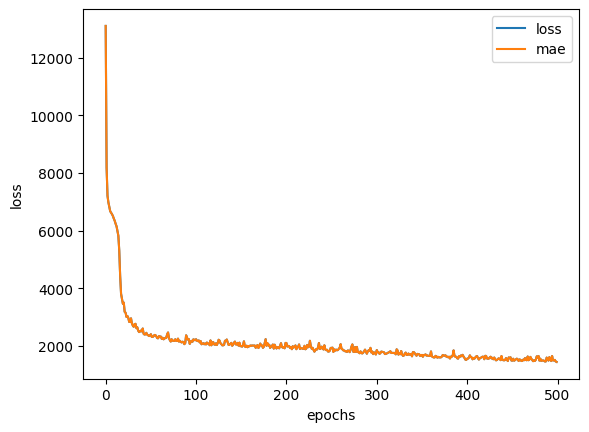

In [369]:

# Plot history (also known as a loss curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");
     


In [370]:
model_4.summary()

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_285 (Dense)           (None, 100)               1200      
                                                                 
 dense_286 (Dense)           (None, 100)               10100     
                                                                 
 dense_287 (Dense)           (None, 100)               10100     
                                                                 
 dense_288 (Dense)           (None, 100)               10100     
                                                                 
 dense_289 (Dense)           (None, 100)               10100     
                                                                 
 dense_290 (Dense)           (None, 100)               10100     
                                                                 
 dense_291 (Dense)           (None, 1)               

In [373]:
y_pred = model_4.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [374]:
y_pred

array([[ 9204.671 ],
       [ 5320.728 ],
       [29881.926 ],
       [ 9351.634 ],
       [33483.656 ],
       [ 4557.4097],
       [ 2109.1912],
       [14183.8545],
       [ 3779.078 ],
       [10308.871 ],
       [18203.266 ],
       [ 7237.3354],
       [ 3920.9812],
       [46012.926 ],
       [48025.113 ],
       [44161.848 ],
       [ 9905.931 ],
       [43031.99  ],
       [ 8276.712 ],
       [21823.76  ],
       [ 5137.322 ],
       [ 7458.7666],
       [ 1238.9895],
       [ 2907.9216],
       [11193.115 ],
       [11035.984 ],
       [12760.753 ],
       [ 5218.932 ],
       [ 9817.647 ],
       [ 1141.268 ],
       [ 8317.966 ],
       [11957.298 ],
       [ 2009.5421],
       [ 5724.6357],
       [ 2946.969 ],
       [ 7512.4976],
       [ 2637.5938],
       [ 7362.1562],
       [24445.732 ],
       [38568.426 ],
       [ 4640.1704],
       [ 2680.5867],
       [11772.2705],
       [12299.831 ],
       [ 4899.7   ],
       [12444.418 ],
       [ 3620.626 ],
       [ 4432

In [383]:
#plt.scatter(y_test, y_pred, c='r')
#plt.scatter(X_test, y_test, c='b')
#plt.bar(y_pred, c='r', width=0.01)
#plt.plot(y_test, c='g')